In [1]:
# 데이터 불러오기
import pandas as pd

df = pd.read_csv("C://users/JunYoungPark/ai_study/data_files/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# 결측값 확인
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [3]:
# 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


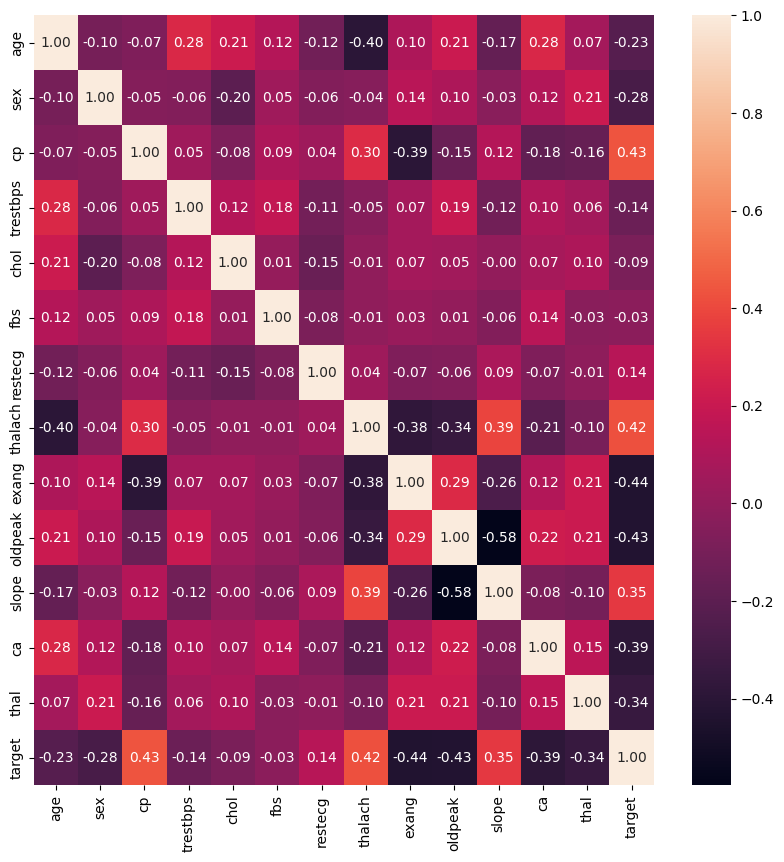

In [4]:
# corr 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [5]:
# X, y 나누기
X = df.drop(columns=['target'])
y = df['target']

In [6]:
# normalization (accuracy 향상을 위해 정규화)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [8]:
# 모델 생성 
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(13, )))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [15]:
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [10]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
7/7 [==============================] - 1s 56ms/step - loss: 0.6712 - accuracy: 0.5959 - val_loss: 0.6276 - val_accuracy: 0.7959
Epoch 2/30
7/7 [==============================] - 0s 10ms/step - loss: 0.6219 - accuracy: 0.6891 - val_loss: 0.5696 - val_accuracy: 0.7551
Epoch 3/30
7/7 [==============================] - 0s 10ms/step - loss: 0.5691 - accuracy: 0.7150 - val_loss: 0.5218 - val_accuracy: 0.7959
Epoch 4/30
7/7 [==============================] - 0s 11ms/step - loss: 0.5068 - accuracy: 0.7876 - val_loss: 0.4704 - val_accuracy: 0.7755
Epoch 5/30
7/7 [==============================] - 0s 11ms/step - loss: 0.4762 - accuracy: 0.7876 - val_loss: 0.4252 - val_accuracy: 0.7755
Epoch 6/30
7/7 [==============================] - 0s 10ms/step - loss: 0.4548 - accuracy: 0.8187 - val_loss: 0.3977 - val_accuracy: 0.7755
Epoch 7/30
7/7 [==============================] - 0s 11ms/step - loss: 0.4112 - accuracy: 0.8290 - val_loss: 0.3806 - val_accuracy: 0.7959
Epoch 8/30
7/7 [===========

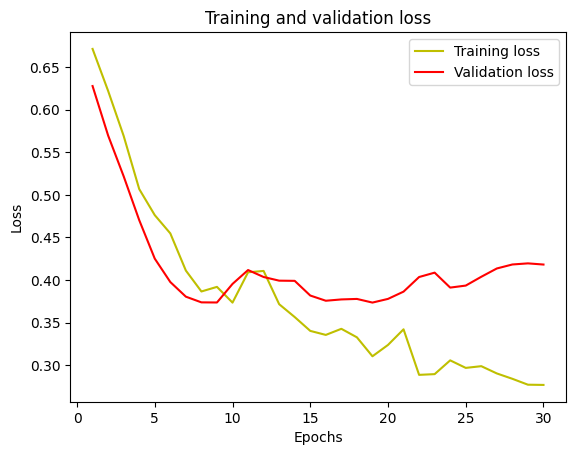

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

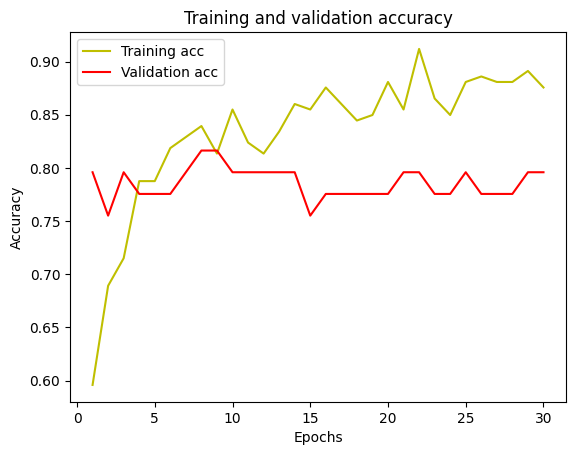

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# 모델 평가
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)  # 0.5 기준으로 이진 분류

2/2 [==============================] - 0s 4ms/step


In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_pred, y_test))
print()
print(classification_report(y_pred, y_test))
print()
print(confusion_matrix(y_pred, y_test))

0.8688524590163934

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61


[[25  4]
 [ 4 28]]
